In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


In [97]:
data = pd.read_csv('data.csv')


In [98]:
data.head(5)

,S.no,Symbol,Date,Open,High,Low,Close,Vol
0,0,ACEDBL,2012-01-01.csv,114.0,113.0,112.0,113.0,"1,962"
1,1,ACEDPO,2012-01-01.csv,188.0,114.0,114.0,114.0,"10,000"
2,2,ADBL,2012-01-01.csv,115.0,115.0,113.0,114.0,"1,111"
3,3,AHPC,2012-01-01.csv,319.0,319.0,312.0,312.0,377
4,4,ALDBL,2012-01-01.csv,102.0,101.0,101.0,101.0,30


In [99]:
data.shape

(250901, 8)

In [100]:
data.isnull()

,S.no,Symbol,Date,Open,High,Low,Close,Vol
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
250896,False,False,False,False,False,False,False,False
250897,False,False,False,False,False,False,False,False
250898,False,False,False,False,False,False,False,False
250899,False,False,False,False,False,False,False,False


In [101]:
data.isnull().sum()

S.no        0
Symbol    140
Date        0
Open        0
High        0
Low         0
Close       0
Vol         0
dtype: int64

In [102]:
data['Date'] = pd.to_datetime(data['Date'].str.replace('.csv', '', regex=False), format='%Y-%m-%d')


In [103]:
data

,S.no,Symbol,Date,Open,High,Low,Close,Vol
0,0,ACEDBL,2012-01-01,114.0,113.0,112.0,113.0,"1,962"
1,1,ACEDPO,2012-01-01,188.0,114.0,114.0,114.0,"10,000"
2,2,ADBL,2012-01-01,115.0,115.0,113.0,114.0,"1,111"
3,3,AHPC,2012-01-01,319.0,319.0,312.0,312.0,377
4,4,ALDBL,2012-01-01,102.0,101.0,101.0,101.0,30
...,...,...,...,...,...,...,...,...
250896,117,TRH,2020-03-22,206.0,206.0,202.0,206.0,"1,575"
250897,118,UIC,2020-03-22,313.0,313.0,301.0,307.0,636
250898,119,UMHL,2020-03-22,100.0,100.0,100.0,100.0,519
250899,120,UPCL,2020-03-22,73.0,73.0,73.0,73.0,10


In [104]:
data['Date'] = data['Date'].astype(str)
data['Date'] = data['Date'].str.replace('.csv', '', regex=False)
data['Date'] = pd.to_datetime(data['Date'])
stock = 'ACEDBL'  
stock_data = data[data['Symbol'] == stock].copy()

stock_data = stock_data.sort_values('Date')


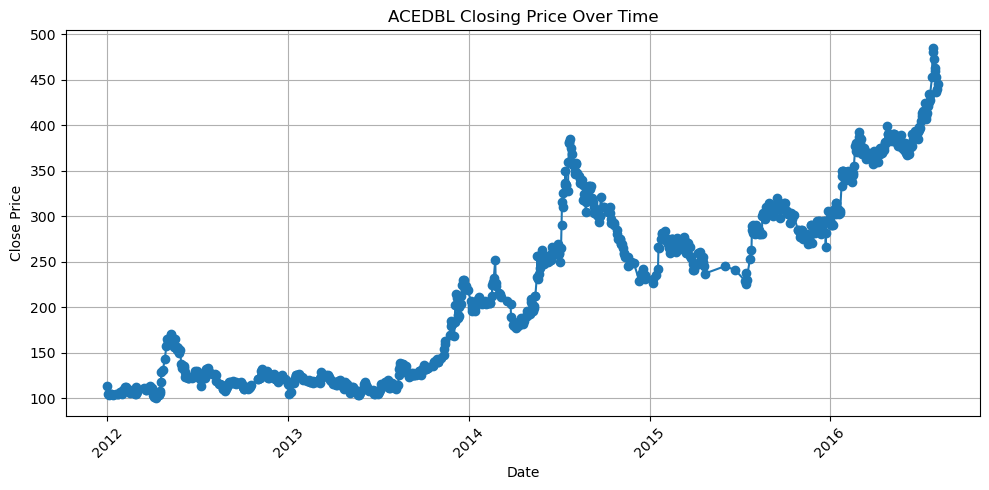

In [105]:
plt.figure(figsize=(10, 5))
plt.plot(stock_data['Date'], stock_data['Close'], marker='o')
plt.title(f'{stock} Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [106]:
ACEDBL_data = data[data['Symbol'] == 'ACEDBL'].copy()

In [107]:
ACEDBL_data.head(5)

,S.no,Symbol,Date,Open,High,Low,Close,Vol
0,0,ACEDBL,2012-01-01,114.0,113.0,112.0,113.0,"1,962"
151,0,ACEDBL,2012-01-03,113.0,105.0,105.0,105.0,100
230,0,ACEDBL,2012-01-04,105.0,103.0,103.0,103.0,"2,572"
374,0,ACEDBL,2012-01-08,103.0,107.0,105.0,105.0,613
444,0,ACEDBL,2012-01-09,105.0,105.0,105.0,105.0,500


In [108]:
ACEDBL_data.shape

(802, 8)

In [109]:
ACEDBL_data.isnull().sum()

S.no      0
Symbol    0
Date      0
Open      0
High      0
Low       0
Close     0
Vol       0
dtype: int64

In [110]:
df = ACEDBL_data.copy()

In [111]:
df['Date'] = pd.to_datetime(df['Date'])
df['Vol'] = df['Vol'].astype(str).str.replace(',', '').astype(int)

In [112]:
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

In [113]:
close_series = df['Close']

In [114]:
# Model arima for time series

In [116]:
model = ARIMA(close_series, order=(5,1,0))  
model_fit = model.fit()

C:\Users\absol\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\absol\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\absol\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [117]:
forecast = model_fit.forecast(steps=5)
print("Next 5 days predicted Close prices:")
print(forecast)

Next 5 days predicted Close prices:
802    444.144118
803    445.182778
804    444.784102
805    445.015749
806    444.874866
Name: predicted_mean, dtype: float64


C:\Users\absol\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


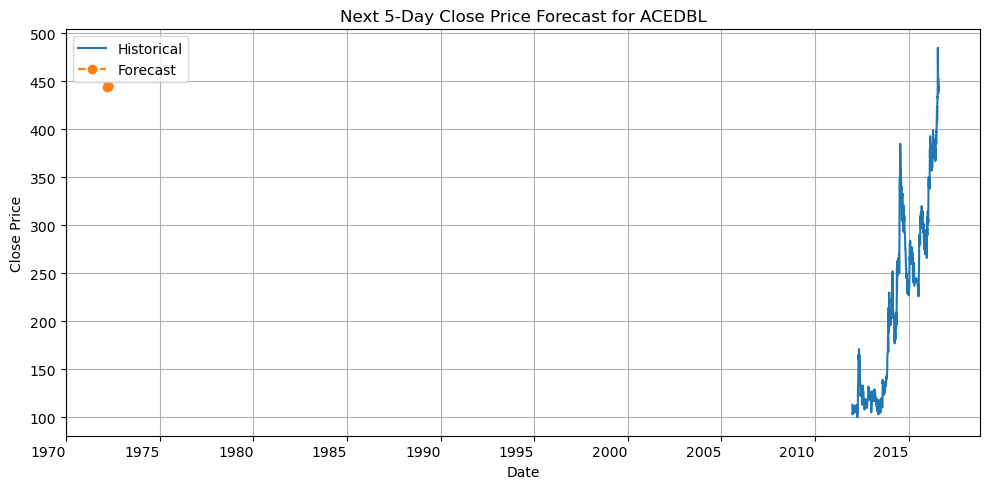

In [118]:
plt.figure(figsize=(10,5))
close_series.plot(label='Historical')
forecast.plot(label='Forecast', style='--', marker='o')
plt.title("Next 5-Day Close Price Forecast for ACEDBL")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()